In [3]:
#kutuphaneler
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

### Soru1
One hot encoding modelin görmediği veriye nasıl uygulanır?

Verileri, numerik ve kategorik veriler olarak ikiye ayırabiliriz. Veri setleri sektöre göre farklı değişkenler içerirler. Kategorik veriler bazı makine öğrenmesi modelleri için uygun olmaz. Örneğin derin öğrenmenin temeli olan sinir ağları, girdi değerlerinin sayısal olmasını bekler.Bu nedenle veri ön işleme adımında kategorik verileri numerik hâle dönüştürürüz.
One-Hot Encoding, kategorik değişkenlerin ikili vektörler olarak temsilidir. Bu kategorik değerler ilk olarak tamsayı değerlere eşlenir. Her bir tamsayı değeri daha sonra tamamı 0 olan bir ikili vektör olarak temsil edilir (1 olarak işaretlenen tamsayının dizini hariç).

One hot encodingi uygulamadan önce veri seti validation ve train olarak ayrılır. Bu işlemden sonra ayrılan veri setleri aynı sayıda kolonlara sahip olmadığında hata alınmaktadır. Hatayı önlemek için bilinmeyen kategorik değişkenlerin bulunduğu kolon değerlerine 0 atanması gerekmektedir. Bu işlem için 'handle_unknown = ignore' yöntemi kullanılmaktadır. Bu işlem sonunda her iki veri setindeki kolon sayıları eşitlenmiş olur.

In [ ]:
#validation ve train olarak ayrılmış veri setine alınacak hatayı önlemek için yapılacak encoder işlemi
ohe = OneHotEncoder(handle_unknown = 'ignore')
data = ohe.fit_transform(df2[columns_to_encode])

### Soru2
Labelencoding'de ilgili kolon için ölçeklendirme nasıl yapılır? (Verinin doğru etkisiyle sayısal olarak dönüştürülmesi)

Label Encoding, kategorik değişkenlerin tahminlerde kullanılabilmesi için makine öğrenmesi algoritmalarına uygun bir forma dönüştürüldüğü bir süreçte kullanılmaktadır. Veriyi birebir sayısallaştırmaya yarar. Yani kategorik her veriye sayısal bir değer atar. Label Encoding’de, her bir veri için alfabetik sıralamaya göre benzersiz bir tam sayı atanır. 

Kısacası aşağıdaki durumlarda Label Encoding uygularız:
- Kategorik özellik sıralıdır
- Tek etkin kodlama yüksek bellek tüketimine yol açabileceğinden kategori sayısı oldukça fazladır.

Örneğin cinsiyet değişkeninde eşsiz iki değer vardır : Female ve Male. F alfabetik olarak daha önde olduğu için Female 0, Male 1 değerini alır. Veri setimizde bulunan ülke değişkeninde ise 3 ayrı değer vardır: Tr, Us ve Fr. Aynı şekilde Fr 0, Tr 1 ve Us 2 değerini alır.

In [4]:
# Label Encoder için ihtiyaç olan veri setinin import edilmesi
data2 = pd.read_csv('data_odev5.csv')

In [5]:
data2.head(10)

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10.0,e
1,tr,125,36,11.0,e
2,tr,135,34,10.0,k
3,tr,133,30,9.0,k
4,tr,129,38,12.0,e
5,tr,180,90,30.0,e
6,tr,190,80,25.0,e
7,tr,175,90,35.0,e
8,tr,177,60,22.0,k
9,us,185,105,33.0,e


In [6]:
le = LabelEncoder()
data2["cinsiyet"] = le.fit_transform(data2["cinsiyet"])
data2["ulke"] = le.fit_transform(data2["ulke"])
data2.head(10)

,ulke,boy,kilo,yas,cinsiyet
0,1,130,30,10.0,0
1,1,125,36,11.0,0
2,1,135,34,10.0,1
3,1,133,30,9.0,1
4,1,129,38,12.0,0
5,1,180,90,30.0,0
6,1,190,80,25.0,0
7,1,175,90,35.0,0
8,1,177,60,22.0,1
9,2,185,105,33.0,0


Ordinal Encoding veri setinde bulunan sıralama niteliğine sahip veriler üzerinde kullanılır. Kısaca ordinal ölçek türündeki gözlem değerleri bu yöntem ile sayısallaştırılır.
Örneğin title değişkenine baktığımızda 5 ayrı değer vardır: Junior, Senior, Manager, Director, Ceo. Değerleri incelediğimizde Junior<Senior<Manager<Director<Ceo sıralamasını görebiliriz bu nedenle de Junior: 0 < Senior: 1 < Manager: 2 < Director: 3 < Ceo: 4 değerlerini alır.

In [7]:
# Ordinal Encoder için ihtiyaç olan datanın oluşturulması
dt={'Employee ID':[34,56,78,80,9,23,45,54],
          'Gender':['Female','Female','Male','Female','Male','Male','Male','Female'],
          'Age':[35,23,29,40,37,28,45,26],
          'Year of Exprerience':[13,1,7,17,10,6,22,4],
          'Ability Score ':[7,1,5,8,6,4,10,3],
          'Title':['Manager','Junior','Senior','Director','Manager','Senior','Ceo','Senior'],
          'Salary(TL)':[25876,4500,10580,50080,29456,8596,90000,7900]}

In [8]:
df = pd.DataFrame(dt)
df

,Employee ID,Gender,Age,Year of Exprerience,Ability Score,Title,Salary(TL)
0,34,Female,35,13,7,Manager,25876
1,56,Female,23,1,1,Junior,4500
2,78,Male,29,7,5,Senior,10580
3,80,Female,40,17,8,Director,50080
4,9,Male,37,10,6,Manager,29456
5,23,Male,28,6,4,Senior,8596
6,45,Male,45,22,10,Ceo,90000
7,54,Female,26,4,3,Senior,7900


In [9]:
# Ordinal Encoder için seçilen kategorinin belirlenmesi
categories = pd.Categorical(df['Title'], categories=['Junior','Senior','Manager','Director','Ceo'], ordered=True)
print(categories)

['Manager', 'Junior', 'Senior', 'Director', 'Manager', 'Senior', 'Ceo', 'Senior']
Categories (5, object): ['Junior' < 'Senior' < 'Manager' < 'Director' < 'Ceo']


In [10]:
# Ordinal Encoder işleminin yapılması
oe = OrdinalEncoder()
df['Title'] = oe.fit_transform(df[['Title']])
df

,Employee ID,Gender,Age,Year of Exprerience,Ability Score,Title,Salary(TL)
0,34,Female,35,13,7,3.0,25876
1,56,Female,23,1,1,2.0,4500
2,78,Male,29,7,5,4.0,10580
3,80,Female,40,17,8,1.0,50080
4,9,Male,37,10,6,3.0,29456
5,23,Male,28,6,4,4.0,8596
6,45,Male,45,22,10,0.0,90000
7,54,Female,26,4,3,4.0,7900


### Soru3
Imbalance datasette train test split yaparken neleri göz önünde bulundurmalıyız?

Inbalance dataset yani dengesiz veri seti; sınıflandırma yaparken, sınıfların eşit dağılmadığı, yani her sınıf için yaklaşık olarak aynı sayıda verinin olmadığı veri kümesidir. 

Dengesiz veri kümelerini, eğitim veri kümesi (training dataset) ve test veri kümesi (test dataset) olarak ikiye ayırırken, verilerin dengesizlik oranında, eğitim ve test kümelerine eşit dağılması gerekir. Yani her iki kümede sınıfların oranının aynı olması, modelin performansının istikrarlı (consistency) olması açısından önemli.

Dolayısıyla, veri kümesini eğitim ve test veri kümelerine ayırırken, train_test_split() fonksiyonundaki “stratify” parametresiyle, çapraz doğrulama skorunu (cross-validation score) hesaplarken ve hiper parametreleri (hyper-parameters) GridSearchCV veya RandomizedSearchCV ile belirlerken katmanlama durumu dikkate almamız gerekir.

In [ ]:
#örnek kod

#Eğitim ve test veri kümelerini ayırırken ;
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,stratify=y) #y-hedef değişken

#Çapraz-doğrulama skorunu hesaplarken ;
from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(n_splits=10)
score = cross_val_score(classifier, X, y, cv=cv=skf.split(X,y))

#RandomizedSearchCV /GridSearchCV uygularken ;
cv = StratifiedShuffleSplit(n_splits=5, random_state=1)
classifier = RandomizedSearchCV(classifier,parameter=parameters, cv=cv)

Veri setini train ve test olarak ayırırken dikkate alınması gereken bazı önemli noktalar şöyle sıralanabilir:

- Train veri setindeki örneklerin sayıca test veri setindeki örneklerden fazla olması beklenir. Makine ögrenmesinde, algoritma ne kadar çok veri ile eğitilirse algoritmanın ögrenme performansı da o kadar artacaktır. Bu nedenle de genellikle algoritmanın eğitimi için kullanılan train veri setindeki örnek sayısı test veri setindeki örnek sayısından fazla tutulur.
- Train ve test veri seti ayrımında örneklerin rastgele dağılması önemlidir. Eger örnekler elle müdahale edilerek train ve test veri setlerine dağıtılıyorsa, bu durum yapılacak analizin güvenilirliğine gölge düşürecektir.
- Veri setinin train ve test veri seti olarak bölünmesi sırasında hedef niteliğe ait sınıfın train ve test veri setlerindeki dağılımına özen gösterilmelidir. Hem egitim hem de test veri setinde, ana veri setindeki her bir sınıfa ait örnekler bulunmalıdır. 

Örneğin; bir kliniğe ait toplamda 300 örnekten oluşan bir veri setinde hedef nitelik hastalık durumu olsun. Hedef niteligin de “Var” ve “Yok” şeklinde iki sınıf değeri olsun. Hastalığın görüldüğü örnek sayısı 120, görülmediği örnek sayısı 180 olsun. Veri setinin %90’lık kısmının train, %10’luk kısmının test veri seti olacak biçimde ikiye ayrıldığı düşünülsün. Eğer sınıf dağılımları göz ardı edilirse, hastalığın görüldüğü 120 örneğin 120’si de train veri setine gidebilir. Bu durumda test veri setinde hastalığın görüldüğü hiçbir örnek yer almayacaktır. Bu şekilde yapılan performans değerlendirmesi ise sağlıklı olmayacaktır; çünkü algoritmanın genel doğruluk değerinin yanında veri setindeki sınıfları ne oranda doğru tahmin ettiği de performans değerlendirmesi için önemli bir ölçüdür.

Bazen de tam aksi durum söz konusu olabilir. Klinik veri seti örneğinden devam edilecek olursa, train veri setine hastalığın görüldüğü örneklerden hiçbiri denk gelmeyerek hastalık görülen örneklerin tümü test veri setine düşebilir. Algoritmanın train veri setinde hiç görmediği bir sınıfa ait örneklerin test veri setinde bulunması durumunda, algoritma o sınıfa ait örnekleri eğitilirken gördügü, tanıdığı ve ögrendiği diğer sınıfa atamaya eğilimli olacaktır. Bu nedenle; hedef niteliğin sınıf değerlerine ait örneklerine train ve test veri setlerinin her ikisinde de bulunması beklenir.

### Soru4 
Validation dataseti (modelin görmediği) nasıl oluşturulur ve nasıl predict etmeye hazır hale getirilir?

Validation bölümü train veri seti içinden seçilir. Train veri seti üzerinde doğru model seçimi yapılarak algoritma belirlenir. Validation bölümünde ise uygulanan model iyileştirilmeye çalışılır. Bunun için hiperparametrik (hyperparameter tuning) uygulamalar denenerek en optimum katsayılar/ağırlıklar bulunmaya çalışılır. Özellikle çok büyük veri setleri üzerinde sürekli Train datası üzerinden çalışılamayacağı için küçük bir bölüm alınarak validation olarak tanımlanır. Train ve test bölümlerinde yaptığımız işlemleri validation bölümünde de uygulamalıyız ki başarılı bir model elde edelim.

### Soru5 
predict_proba metoduyla oran nasıl hesaplanır ve treshold nasıl değiştirilir?

Bazı estimator’lar Gözetimli / Gözetimsiz öğrenme için modelin doğruluğunu tahminleyebilirler, bu estimator’lara Predictor denir. Bir predictor, predict() metodu ile daha önce öğrenilmemiş data üzerinde tahmin yapmaktadır.

- predict(): Gerçek sınıfı tahmin etmek için kullanılır.
- predict_proba(): Sınıf olasılıklarını tahmin etmek için kullanılır.

predict_proba, olasılıkların hesaplanacağı verilere karşılık gelen tek bir argümanı kabul eder ve girdi veri noktaları için sınıf olasılıklarını içeren bir dizi liste döndürür. 

In [ ]:
#Sınama verisinin etiketlerini elde etmek için
y_pred_dt = dt.predict(X_test)
#Sınama veri kümesinin sınıflara ait olma olasılıklarını almak için
y_pred_proba_dt = dt.predict_proba(X_test)

#Aynı adımları rastgele orman yöntemi için tekrarlamak
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)

#Threshold uygulama ve değiştirme
y_pr_proba = data.predict_proba(X_test)
y_pr_proba = (data.predict_proba(X_test)[:,1] >= 0.3).astype(bool)

### Soru6 
Fraud case'i üzerinde train&test&validation split, encoding, scaling,modelleme çalışmaları Python'da yapılarak, modelin görmediği dataset üzerinde başarılı sonuç alacak bir model örneği yapılmalı.

In [11]:
import pandas as pd
import numpy as np
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go


#for quick viz
import seaborn as sns

#ml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import random

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [12]:
data_auto = pd.read_csv('auto_insurance_csv.csv')

data_auto = data_auto.drop(['_c39','Unnamed: 0'], axis = 1)
data_auto['umbrella_limit'] = data_auto.umbrella_limit.fillna("9999")
data_auto['police_report_available'] = data_auto.police_report_available.fillna("MISSING")
data_auto['policy_csl'] = data_auto.policy_csl.fillna("MISSING")
data_auto['policy_bind_date'] = pd.to_datetime(data_auto['policy_bind_date'])
data_auto['incident_date'] = pd.to_datetime(data_auto['incident_date'])
data_auto['claim_day_of_policy'] = (data_auto.incident_date - data_auto.policy_bind_date).dt.days
data_auto['location_check'] = np.nan
data_auto['location_check'] = np.where(data_auto['policy_state'] == data_auto['incident_state'], True, False)
data_auto['fraud_reported'] = data_auto['fraud_reported'].str.replace('Y', '1')
data_auto['fraud_reported'] = data_auto['fraud_reported'].str.replace('N', '0')
data_auto['fraud_reported'] = data_auto['fraud_reported'].astype(int)
data_auto['umbrella_limit'] = data_auto.umbrella_limit.astype(str)
umbrealla = data_auto['umbrella_limit'].unique()
for umb in umbrealla:
  if (umb != '0.0') & (umb != '9999'):
    data_auto['umbrella_limit'] = data_auto['umbrella_limit'].str.replace(umb, 'other')
    
hobbies = data_auto['insured_hobbies'].unique()
for hobby in hobbies:
  if (hobby != 'chess') & (hobby != 'cross-fit'):
    data_auto['insured_hobbies'] = data_auto['insured_hobbies'].str.replace(hobby, 'other')

data_auto['age'] = data_auto.age.fillna(9999)
bin_labels = ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65','9999']
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 9999]

data_auto['age_group'] = pd.cut(data_auto['age'], bins = bins, labels = bin_labels, include_lowest = True)
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
bin_labels = ['0-50','51-100','101-150','151-200','201-250','251-300','301-350','351-400','401-450','451-500']

data_auto['months_as_customer_groups'] = pd.cut(data_auto['months_as_customer'], bins = 10, labels = bin_labels, include_lowest= True)
bins = list(np.linspace(0,2500, 6, dtype = int))
bin_labels = ['very low', 'low', 'medium', 'high', 'very high']

data_auto['policy_annual_premium_groups'] = pd.cut(data_auto['policy_annual_premium'], bins = bins, labels=bin_labels)
bins = list(np.linspace(0,2000, 5, dtype = int))
bin_labels = ['0-500', '501-1000', '1001-1500', '1501-2000']

data_auto['policy_deductable_group'] = pd.cut(data_auto['policy_deductable'], bins = bins, labels = bin_labels)

data_auto = data_auto.drop(['age', 'months_as_customer', 'policy_deductable', 'policy_annual_premium'], axis = 1)
required_columns = ['incident_date','policy_state', 'policy_csl', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount','auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'claim_day_of_policy',
       'location_check', 'age_group', 'months_as_customer_groups',
       'policy_annual_premium_groups', 'policy_deductable_group']
da = data_auto[required_columns]

C:\Users\cimen\AppData\Local\Temp/ipykernel_17448/3898785015.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  data_auto['umbrella_limit'] = data_auto['umbrella_limit'].str.replace(umb, 'other')


In [13]:
da

,incident_date,policy_state,policy_csl,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_make,auto_model,auto_year,fraud_reported,claim_day_of_policy,location_check,age_group,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group
0,2015-01-25,OH,250/500,0.0,466132,MALE,MD,craft-repair,other,husband,...,Saab,92x,2004,1,100,False,46-50,301-350,medium,501-1000
1,2015-01-21,IN,250/500,other,468176,MALE,MD,machine-op-inspct,other,other-relative,...,Mercedes,E400,2007,1,3130,False,41-45,201-250,medium,1501-2000
2,2015-02-22,OH,MISSING,other,430632,FEMALE,PhD,sales,other,own-child,...,Dodge,RAM,2007,0,5282,False,26-30,101-150,medium,1501-2000
3,2015-01-10,IL,MISSING,other,608117,FEMALE,PhD,armed-forces,other,unmarried,...,Chevrolet,Tahoe,2014,1,8996,False,41-45,251-300,medium,1501-2000
4,2015-02-17,IL,MISSING,other,610706,MALE,Associate,sales,other,unmarried,...,Accura,RSX,2009,0,256,False,41-45,201-250,high,501-1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2015-02-22,OH,MISSING,0.0,431289,FEMALE,Masters,craft-repair,other,unmarried,...,Honda,Accord,2006,0,8622,False,36-40,0-50,medium,501-1000
996,2015-01-24,IL,MISSING,9999,608177,FEMALE,PhD,prof-specialty,other,wife,...,Volkswagen,Passat,2015,0,384,False,41-45,251-300,medium,501-1000
997,2015-01-23,OH,250/500,other,442797,FEMALE,Masters,armed-forces,other,other-relative,...,Suburu,Impreza,1996,0,4358,False,9999,101-150,medium,0-500
998,2015-02-26,IL,500/1000,9999,441714,MALE,Associate,handlers-cleaners,other,wife,...,Audi,A5,1998,0,1196,False,61-65,451-500,medium,1501-2000


In [14]:
#Train 800 olarak ve validation 200 olarak verilerinin ayrılması
da_val = da.sort_values(by='incident_date',ascending=False).head(200)
da2 = da.sort_values(by='incident_date',ascending=False).tail(800)

In [15]:
#incident_date'e göre sıralanması
da.sort_values(by='incident_date',ascending=False)
#incident_date verisinin kaldırılması
da_val = da_val.drop(["incident_date"],axis=1)
da2 = da2.drop(["incident_date"],axis=1)

In [16]:
#kategorik verilerin kolonlarının ayrılma işlemi
cat_cols = ['age_group', 'months_as_customer_groups', 'policy_annual_premium_groups','location_check','policy_deductable_group']
for col in cat_cols:
  da2[col] = da2[col].astype('object')

columns_to_encode = []
for col in da2.columns:
  if da2[col].dtype == 'object':
    columns_to_encode.append(col)

columns_to_encode

['policy_state',
 'policy_csl',
 'umbrella_limit',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'location_check',
 'age_group',
 'months_as_customer_groups',
 'policy_annual_premium_groups',
 'policy_deductable_group']

In [17]:
da2.head(10)

,policy_state,policy_csl,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,...,auto_make,auto_model,auto_year,fraud_reported,claim_day_of_policy,location_check,age_group,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group
511,OH,MISSING,0.0,446755,FEMALE,JD,sales,other,husband,0,...,Volkswagen,Jetta,2003,0,4427,False,46-50,251-300,medium,501-1000
894,IN,MISSING,0.0,475891,MALE,MD,priv-house-serv,other,not-in-family,0,...,Suburu,Impreza,2000,0,8921,False,31-35,0-50,medium,0-500
125,IN,MISSING,other,603948,MALE,JD,craft-repair,other,unmarried,47200,...,Ford,Escape,2013,0,205,False,36-40,201-250,medium,501-1000
895,IL,MISSING,0.0,462525,MALE,High School,armed-forces,other,own-child,26500,...,Saab,92x,1998,1,1980,False,36-40,151-200,medium,0-500
485,IN,MISSING,0.0,471366,MALE,Associate,adm-clerical,other,husband,0,...,Nissan,Maxima,1995,0,7692,False,26-30,51-100,medium,1501-2000
398,OH,MISSING,0.0,604328,FEMALE,High School,prof-specialty,other,unmarried,0,...,Saab,95,2015,0,8231,False,26-30,0-50,medium,0-500
295,IN,MISSING,0.0,438546,FEMALE,Associate,prof-specialty,other,wife,0,...,Mercedes,ML350,2009,0,3483,False,31-35,101-150,medium,0-500
542,IL,MISSING,9999,431354,FEMALE,MD,prof-specialty,other,husband,0,...,Saab,92x,2014,0,2591,False,31-35,51-100,medium,1501-2000
285,IL,MISSING,0.0,476737,FEMALE,High School,adm-clerical,other,not-in-family,0,...,Accura,MDX,2008,0,6798,False,31-35,101-150,medium,0-500
858,OH,MISSING,0.0,437470,FEMALE,College,tech-support,other,other-relative,0,...,Nissan,Pathfinder,2000,0,5385,False,41-45,201-250,low,501-1000


In [18]:
da3 = pd.get_dummies(da2, columns = columns_to_encode)
da3

,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,fraud_reported,...,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low,policy_deductable_group_0-500,policy_deductable_group_1501-2000,policy_deductable_group_501-1000
511,446755,0,-46200,9,1,2,3,6560,2003,0,...,0,0,0,0,1,0,0,0,0,1
894,475891,0,0,6,1,1,3,6000,2000,0,...,0,0,0,0,1,0,0,1,0,0
125,603948,47200,-69700,12,3,2,3,36300,2013,0,...,0,0,0,0,1,0,0,0,0,1
895,462525,26500,0,23,3,0,3,55200,1998,1,...,0,0,0,0,1,0,0,1,0,0
485,471366,0,-31700,0,1,2,1,48290,1995,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,472814,0,0,3,4,0,1,67800,2011,0,...,0,0,1,0,0,0,0,1,0,0
457,470559,38000,-41200,5,1,2,1,79800,2011,1,...,0,0,1,0,0,0,0,0,1,0
478,477260,0,0,6,1,1,2,6300,2001,1,...,0,0,0,1,0,0,0,0,1,0
41,470577,0,-24100,1,1,1,1,97080,2001,1,...,0,0,1,0,0,0,0,1,0,0


In [19]:
da_encode = pd.get_dummies(da2, columns = columns_to_encode)
cl=[]
for _ in da_encode.columns:
    cl.append(_)

In [20]:
# kategorik ve sayısal kolonların ayrılması
da_encode_10 = da_encode.iloc[:,:11]
cl_remain = cl[11:]

In [21]:
da_encode_10.head(10)

,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,fraud_reported,claim_day_of_policy
511,446755,0,-46200,9,1,2,3,6560,2003,0,4427
894,475891,0,0,6,1,1,3,6000,2000,0,8921
125,603948,47200,-69700,12,3,2,3,36300,2013,0,205
895,462525,26500,0,23,3,0,3,55200,1998,1,1980
485,471366,0,-31700,0,1,2,1,48290,1995,0,7692
398,604328,0,-47400,7,1,0,1,3190,2015,0,8231
295,438546,0,-54600,13,1,1,2,72120,2009,0,3483
542,431354,0,0,21,3,1,3,48070,2014,0,2591
285,476737,0,-40900,8,1,0,1,70290,2008,0,6798
858,437470,0,0,17,3,2,3,42500,2000,0,5385


In [22]:
features = []
for col in da3.columns:
  if col != 'fraud_reported':
    features.append(col)

target = 'fraud_reported'

X = da3[features]
y = da3[target]

In [23]:
#Standart ölçeklendirme işlemi
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.76745023, -0.90867046, -0.68250677, ..., -0.71374643,
        -0.67616189,  1.36652242],
       [-0.36042417, -0.90867046,  0.96145549, ...,  1.4010578 ,
        -0.67616189, -0.73178456],
       [ 1.42851515,  0.79450874, -1.51872134, ..., -0.71374643,
        -0.67616189,  1.36652242],
       ...,
       [-0.34129942, -0.90867046,  0.96145549, ..., -0.71374643,
         1.47893576, -0.73178456],
       [-0.43466004, -0.90867046,  0.10389076, ...,  1.4010578 ,
        -0.67616189, -0.73178456],
       [ 1.55253963,  0.97493027,  0.96145549, ...,  1.4010578 ,
        -0.67616189, -0.73178456]])

In [24]:
#SMOTE
oversample = SMOTE(random_state=9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 42)
X_over, y_over = oversample.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.3, random_state = 1)

C:\Users\cimen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

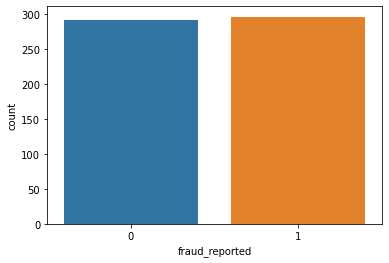

In [25]:
chck = pd.DataFrame()
chck['fraud_reported'] = y_train
sns.countplot(chck['fraud_reported'])

In [26]:
#One Hot Enoding
ohe = OneHotEncoder(handle_unknown='ignore')
da3=ohe.fit_transform(da2[columns_to_encode]).toarray()
da3

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [27]:
da_encode_10.reset_index(drop = True, inplace = True)
da_encode_remain=pd.DataFrame(da3, columns=cl_remain)
da_encode_total = pd.concat([da_encode_10,da_encode_remain], axis=1)
da_encode_total.head(10)

,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,fraud_reported,...,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low,policy_deductable_group_0-500,policy_deductable_group_1501-2000,policy_deductable_group_501-1000
0,446755,0,-46200,9,1,2,3,6560,2003,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,475891,0,0,6,1,1,3,6000,2000,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,603948,47200,-69700,12,3,2,3,36300,2013,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,462525,26500,0,23,3,0,3,55200,1998,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,471366,0,-31700,0,1,2,1,48290,1995,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,604328,0,-47400,7,1,0,1,3190,2015,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,438546,0,-54600,13,1,1,2,72120,2009,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,431354,0,0,21,3,1,3,48070,2014,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,476737,0,-40900,8,1,0,1,70290,2008,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,437470,0,0,17,3,2,3,42500,2000,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
#Feature ve Target
features = []
for col in da_encode_total.columns:
  if col != 'fraud_reported':
    features.append(col)

target = 'fraud_reported'

X = da_encode_total[features]
y = da_encode_total[target]

X

,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,claim_day_of_policy,...,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low,policy_deductable_group_0-500,policy_deductable_group_1501-2000,policy_deductable_group_501-1000
0,446755,0,-46200,9,1,2,3,6560,2003,4427,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,475891,0,0,6,1,1,3,6000,2000,8921,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,603948,47200,-69700,12,3,2,3,36300,2013,205,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,462525,26500,0,23,3,0,3,55200,1998,1980,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,471366,0,-31700,0,1,2,1,48290,1995,7692,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,472814,0,0,3,4,0,1,67800,2011,8397,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
796,470559,38000,-41200,5,1,2,1,79800,2011,759,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
797,477260,0,0,6,1,1,2,6300,2001,6130,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
798,470577,0,-24100,1,1,1,1,97080,2001,854,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
#Standart ölçeklendirme
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.76745023, -0.90867046, -0.68250677, ..., -0.71374643,
        -0.67616189,  1.36652242],
       [-0.36042417, -0.90867046,  0.96145549, ...,  1.4010578 ,
        -0.67616189, -0.73178456],
       [ 1.42851515,  0.79450874, -1.51872134, ..., -0.71374643,
        -0.67616189,  1.36652242],
       ...,
       [-0.34129942, -0.90867046,  0.96145549, ..., -0.71374643,
         1.47893576, -0.73178456],
       [-0.43466004, -0.90867046,  0.10389076, ...,  1.4010578 ,
        -0.67616189, -0.73178456],
       [ 1.55253963,  0.97493027,  0.96145549, ...,  1.4010578 ,
        -0.67616189, -0.73178456]])

In [30]:
# Random Forest
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

92.06349206349206

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       128
           1       0.96      0.88      0.92       124

    accuracy                           0.92       252
   macro avg       0.92      0.92      0.92       252
weighted avg       0.92      0.92      0.92       252



<AxesSubplot:>

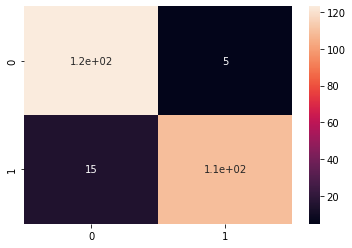

In [31]:
#prediction işlemi
preds = rfc.predict(X_test)

score = rfc.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True)

In [32]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 1000, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [300, 650, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 17, 30, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [35]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 17, 30, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [300, 650, 1000]},
                   random_state=42, verbose=2)

In [36]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 17,
 'bootstrap': False}

93.65079365079364

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       128
           1       0.96      0.91      0.93       124

    accuracy                           0.94       252
   macro avg       0.94      0.94      0.94       252
weighted avg       0.94      0.94      0.94       252



<AxesSubplot:>

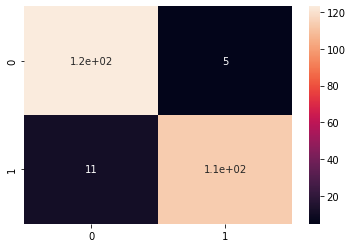

In [56]:
rf2 = RandomForestClassifier(n_estimators=300,min_samples_split=2,min_samples_leaf=1,max_features='sqrt'
                            ,max_depth=17,bootstrap='False')
rf2.fit(X_train, y_train)

preds = rf2.predict(X_test)

score = rf2.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True)

In [57]:
cat_cols = ['age_group', 'months_as_customer_groups', 'policy_annual_premium_groups','location_check','policy_deductable_group']
for col in cat_cols:
  da_val[col] = da_val[col].astype('object')

columns_to_encode = []
for col in da_val.columns:
  if da_val[col].dtype == 'object':
    columns_to_encode.append(col)

da2_val = pd.DataFrame(ohe.transform(da_val[columns_to_encode]).toarray(), columns=cl_remain)
da2_val.head(10)

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,policy_csl_MISSING,umbrella_limit_0.0,umbrella_limit_9999,umbrella_limit_other,...,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low,policy_deductable_group_0-500,policy_deductable_group_1501-2000,policy_deductable_group_501-1000
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [58]:
# Sayısal kolonlar
cl_val = cl[:11]
da_val_num = pd.DataFrame(da_val, columns=cl_val)

da_val_num.reset_index(drop=True, inplace=True)

da3_val = pd.concat([da_val_num,da2_val], axis=1)
da3_val.head(10)

,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,fraud_reported,...,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low,policy_deductable_group_0-500,policy_deductable_group_1501-2000,policy_deductable_group_501-1000
0,441533,57100,0,2,4,0,2,38640,1997,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,472895,0,0,18,3,1,0,42930,2005,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,436364,0,-67000,2,4,0,2,72800,1998,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,479824,0,0,18,3,0,3,34160,2005,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,448294,0,-48800,4,1,2,2,51600,2011,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,432218,0,-56400,20,2,0,2,60500,1999,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,452748,0,-40600,13,2,1,1,57720,2007,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,440757,72600,0,1,3,2,1,52290,1997,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,477373,39300,-60300,23,3,2,2,68760,1998,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9,459298,66900,-51800,17,3,2,3,56320,2000,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [59]:
features = []
for col in da3_val.columns:
  if col != 'fraud_reported':
    features.append(col)

target = 'fraud_reported'

X_val = da3_val[features]
y_val = da3_val[target]

33.5

              precision    recall  f1-score   support

           0       0.94      0.20      0.32       163
           1       0.21      0.95      0.34        37

    accuracy                           0.34       200
   macro avg       0.58      0.57      0.33       200
weighted avg       0.81      0.34      0.33       200



<AxesSubplot:>

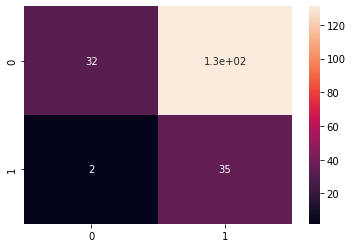

In [60]:
sc = StandardScaler()
X_val = sc.fit_transform(X_val)

preds = rfc.predict(X_val)
score = rfc.score(X_val, y_val)
print(score*100)
print()
print(classification_report(y_val, preds))

cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True)

32.0

              precision    recall  f1-score   support

           0       0.91      0.64      0.75       163
           1       0.31      0.70      0.43        37

    accuracy                           0.66       200
   macro avg       0.61      0.67      0.59       200
weighted avg       0.79      0.66      0.69       200



<AxesSubplot:>

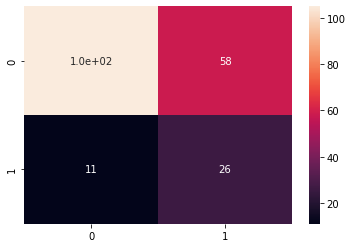

In [61]:
preds = rf2.predict_proba(X_val)
score = rf2.score(X_val, y_val)
y_preds = (preds[:,1] >= 0.6).astype(bool)
print(score*100)
print()
print(classification_report(y_val, y_preds))

cm = confusion_matrix(y_val, y_preds)
sns
sns.heatmap(cm, annot=True)